In [28]:
# konvolutivne mreze imaju neku kombinaciju slojeva konvolucije i sojeva agregacije. Poenta tih slojeva je 
# da smanjimo velicinu ulaza u neku neuronsku mrezu (prvih 15ak minuta na snimku vezbi je okej objasnjenje

# u ovom primeru naucicemo neku mrezu da za nas klasifikuje slike u boji iz cifar10 dataseta
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [29]:
# kao na proslom casu, u kerasu ovaj dataset vec postoji ugradjen
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [30]:
# kada smo ucitali podatke, dobra praksa je uvek da pogledamo sta su ti podaci, da viidmo shape itd
# vidimo da imamo 50000 slika dimenzija 32x32x3  (x3 za RGB jer su u boji)
print(train_images.shape)

(50000, 32, 32, 3)


In [31]:
# imamo samo labele koji su brojevi, pa cemo napraviti i neki niz imena koja tim brojevima odgovaraju
# ovo smo videli na netu koje to tacno kategorije treba da budu
class_names = ['airplane', 'automobile', 'bird', 'car', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

In [32]:
# stampamo min i max vrednosti, cisto da vidimo u kom opsegu se nalaze. Dobra praksa je uvek da te vrednosti
# normalizujemo na interval [0,1]
print(train_images.max())
print(train_images.min())

# pazimo ovde na mogucu gresku pomenutu na proslom casu!
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

# radi provere
print(train_images_normalized.max())
print(train_images_normalized.min())

255
0
1.0
0.0


In [33]:
# slike su vec za nas podeljene u train i test, tako da mozemod a pocnemo da pravimo model
model = models.Sequential()

# nakon sto se primeni konvolucija matrica, u dobijenoj matrici, nad svakim clan treba da se primeni 
# funkcija aktivacije. To se radi da bismo mogli da modelujemo i neke nelinearne zavisnosti (?)
# Linearna regresija moze da modeluje samo linearne zavisnosti, dok je moc neuronskih mreza sto moze da
# modeluje i nelinearne (jer aktuvacione funkcije ne moraju biti linearne)

# ono sto mi ucimo u mrezi je filter/filteri koji se primenjuju na matrice tokom konvolucije(?)
# filteri se zovu i kerneli

# dodajemo slojeve. Posto radimo konvoluciju matrica, potrebno je da stavimo 2D
# Conv2D( broj_filtera_koji_se_uci_na_sloju, shape_za_svaki_filter, aktivaciona_funkcija, shape_inputa)
# mi smo ovde stavili da se za svaki kanal R G i B uci 32 filtera vec na prvom sloju

# pomenuo je jos i opciju padding='...' Padding radi to da oko nase ulazen matrice ubaci jos jedan praznan
# sloj. Ovo se radi zato sto se tokom konvolucije dosta gube ti ivicni podaci. tu postoje razne vrste paddinga
# paddin='same' kaze da ce se padding sloj popuniti istim brojevima kao ivicni red/kolona    (ovo je najcesce) 
# moze i padding sa nulama
# padding ima smisla samo ovde na konvolutivnom sloju
model.add( layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)) )
# najcesce posle jednog(ili vise) konvolutivnog sloja ide sloj agregacje 
# agregacija se jos zove i pooling. Ima razlzicitih vrsta poolinga, npr max pooling, average pooling itd..
# 2D jer je ulaz u ovaj sloj matrica
# argument je koliku podmatricu menjamo jednim brojem. Znaci mi ovde svaku 2x2 podmatricu iz ulaza
# u ovaj sloj menjamo jednim brojem 
# naravno, svi ovi parametri (dimenzije, broj filtera itd...) su promenljivi dok se trenira mreza
model.add( layers.MaxPooling2D((2,2)) )
# mozemo opet npr staviti jedan sloj konvolucije
model.add( layers.Conv2D(64, (3,3), activation='relu') )
# itd mozemo dodavati slojeve kako zelimo...
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Conv2D(64, (3,3), activation='relu') )

In [34]:
# i dalje smo u fazi pre ulazenja u onu obicnu neuronsku mrezu. Ovde npr mozemo uraditi neki pregled
# onoga sto imamo do sad
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [35]:
# sada dodajemo one ostale slojeve kao sto smo ih koristili na proslom casu. U tu obicnu neuronsku mrezu
# ulaz treba da bude vektor, tj mi svaki podatak koji je izasao iz ovog dela sa konvolucijom i agregacijom 
# treba nekako da razvucemo u vektor
model.add( layers.Flatten() )
model.add( layers.Dense(64, activation='relu'))
# i u ovom poslednejm sloju radimo onu klasifikaciju, 10 neurona jer ima 10 klassa,
# akticationa funkcija je softmax zato sto se ona koristi za viseklasnu klasifikaciju
# za poslednji sloj je pokazao i funkciju 'sigmoid' (ne za ova primer nego za cats and dogs  na kraju vezbi)
# sigmoid ceo domen [-inf, inf] slika u [0,1] . Ona se UVEK radi na jednim neuronom, bez obiza da li 
# imamo 2 ili vise klasa:   layers.Dense(1, activation='sigmoid')
# na sigmoidnoj funkciji se jasno vidi granica izmedju klasa (?)
model.add( layers.Dense(10, activation='softmax') )

In [36]:
# pregledamo sta smo dobili
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [37]:
# sada kao i sa svakom drugom neuronskom mrezom treba da obucimo model, da kazemo koji je optimizator, epohe itd
# recimo npr 10 epoha
epochs = 10
# cesta praksa je da se u svako epohi dok se trenira, ne racuna gradijent na osnovu celog skupa, vec
# na osnovu nekog podskupa. Mi ovde npr uzmemo podskup 64, tj u svakoj epohi ce se 64 slik
# provuci kroz mrezu (?)
batch_size = 64
num_classes = len(class_names)   # imamo 10 kategorija

In [43]:
# kao prolsi put, pretvaramo labele u one vektore
train_labels_cat = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_cat = tf.keras.utils.to_categorical(test_labels, num_classes)

In [46]:
# kompajliramo model, tj navodimo optimizer, loss funkciju i metrike
# poemuo je da za binarnu klasifikaciju imamo i BinaryCrossentropy()   (npr u cats and dogs primeru)
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# pokrecemo model tako sto pozivamo fit (pazimo da prosledimo one obradjene, normalizovane podatke)
history = model.fit(train_images_normalized, train_labels_cat
                    , epochs=epochs, batch_size=batch_size
                    , validation_data=(test_images_normalized, test_labels_cat))

Epoch 1/10
782/782 [==============================] - 14s 17ms/step - loss: 1.5845 - accuracy: 0.4203 - val_loss: 1.3388 - val_accuracy: 0.5214
Epoch 2/10
782/782 [==============================] - 13s 17ms/step - loss: 1.2271 - accuracy: 0.5653 - val_loss: 1.2558 - val_accuracy: 0.5563
Epoch 3/10
782/782 [==============================] - 13s 17ms/step - loss: 1.0835 - accuracy: 0.6209 - val_loss: 1.0135 - val_accuracy: 0.6436
Epoch 4/10
782/782 [==============================] - 14s 17ms/step - loss: 0.9818 - accuracy: 0.6547 - val_loss: 0.9817 - val_accuracy: 0.6591
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.9013 - accuracy: 0.6856 - val_loss: 0.9812 - val_accuracy: 0.6607
Epoch 6/10
782/782 [==============================] - 13s 17ms/step - loss: 0.8357 - accuracy: 0.7103 - val_loss: 0.9032 - val_accuracy: 0.6843
Epoch 7/10
782/782 [==============================] - 13s 17ms/step - loss: 0.7936 - accuracy: 0.7217 - val_loss: 0.9037 - val_accuracy:

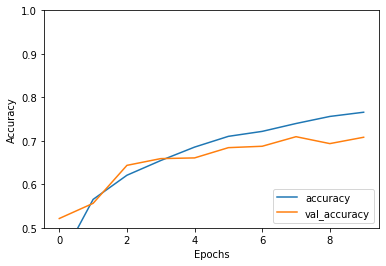

In [52]:
# mozemo sad vizuelizovati ono sto nas zanima
# note: accuracy se u ranijim verzijama tensorflowa zvao acc, pa da obratimo paznju na to koju verziju imamo
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [55]:
# mozemo sad da vidimo kako se nas model ponasa na test skupu
# pogledaj ispis kada se pokrene sa i bez verbose
test_loss, test_acc = model.evaluate(test_images_normalized, test_labels_cat, verbose=2) 

313/313 - 1s - loss: 0.8571 - accuracy: 0.7082


In [60]:
# u realnim okolnostima, ovo sto smo mi radili sa ovim mrezama ne ide bas tako. Cesto se na odredjen broj
# iteracija, mreza sacuva na disk na neki nacin da bi mogla posle ponvo da se korsiti
# ovde je na vezbama pokazao kako bismo to mogli da uradimo

# u jupyter notebooku, mozemo da izvrssavamo komande koje su terminal tipa tako sto koristimo !
! mkdir models
# na windowsu je dir isto sto i ls na lionuxu
! dir

# h5 je opste prihvacena ekstenzija za cuvanje neuronskih mreza
model_path = "models/basic_network.h5"
# ovo ce zamaptiri i arhitekturu mreze i naucene tezine
model.save(model_path)

! dir models\

A subdirectory or file models already exists.


 Volume in drive C has no label.
 Volume Serial Number is A4E9-A988

 Directory of C:\Users\Jovan\Desktop\VI\vezbe\cas_12_konvolutivne_neuronske_mreze

06/28/2021  12:33 PM    <DIR>          .
06/28/2021  12:33 PM    <DIR>          ..
06/28/2021  11:12 AM    <DIR>          .ipynb_checkpoints
06/28/2021  12:33 PM    <DIR>          models
06/28/2021  12:33 PM            40,445 Untitled.ipynb
               1 File(s)         40,445 bytes
               4 Dir(s)  397,047,115,776 bytes free
 Volume in drive C has no label.
 Volume Serial Number is A4E9-A988

 Directory of C:\Users\Jovan\Desktop\VI\vezbe\cas_12_konvolutivne_neuronske_mreze\models

06/28/2021  12:33 PM    <DIR>          .
06/28/2021  12:33 PM    <DIR>          ..
06/28/2021  12:33 PM         1,522,648 basic_network.h5
               1 File(s)      1,522,648 bytes
               2 Dir(s)  397,047,115,776 bytes free


In [64]:
# evo sada kako da npr ucitamo taj model ponovo u memoriju
# napravicemo neki backup prvo, da nebi bas izgubili sve sad
backup_model = model
model = None   # ovim brisemo nas model iz memorije

#print(model)

# ovako mozemo ucitati neki vec postojeci model
model = tf.keras.models.load_model( model_path )
#print(model)

# i sad sa njim mozemo sve ono standarno kao i pre
model.summary()

None
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)          